模型评估结果：
均方误差 (MSE): 106481.31
决定系数 (R²): 0.064

回归系数：
                    Feature  Coefficient
0                       Age    -0.084172
1                    Income     0.006648
2                   Kidhome   -63.465739
3                  Teenhome   -53.209198
4                   Recency     0.362808
5           NumWebPurchases    25.321399
6         NumStorePurchases    23.190938
7         NumDealsPurchases     9.276276
8                TotalSpent     0.038231
9           Education_Basic   114.909225
10     Education_Graduation    40.412109
11         Education_Master   111.813302
12            Education_PhD   164.062783
13     Marital_Status_Alone   128.782821
14  Marital_Status_Divorced   167.067481
15   Marital_Status_Married   149.128757
16    Marital_Status_Single   146.000703
17  Marital_Status_Together   152.396516
18     Marital_Status_Widow   140.320822
19      Marital_Status_YOLO    32.418727


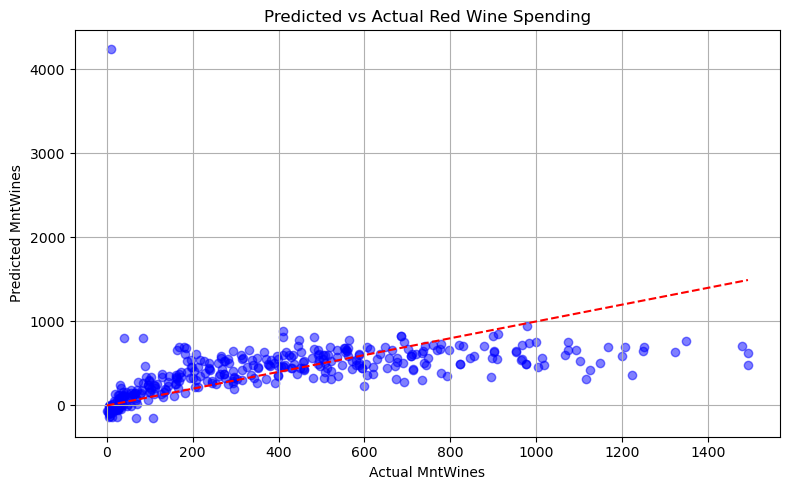

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === 预处理部分（略） ===
df = pd.read_csv('marketing_campaign_NEW.csv', sep='\t')
df['Age'] = 2025 - df['Year_Birth']
df = df[df['Age'] <= 100]
df = df.dropna(subset=['Income'])
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df['TotalSpent'] = df[[
    'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds'
]].sum(axis=1)
features = [
    'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases',
    'TotalSpent'
] + [col for col in df.columns if col.startswith('Education_') or col.startswith('Marital_Status_')]
target = 'MntWines'
# 设置过滤阈值
Setting_Amount = 50  # 你可以改成 100、200 等

# 计算总消费（包括 MntWines）
df['TotalSpendingAll'] = df[[
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]].sum(axis=1)

# 筛选出活跃客户（消费额大于 Setting_Amount）
df_active = df[df['TotalSpendingAll'] >= Setting_Amount].copy()
# 替代原本的 df --> df_active 后进行建模
X = df_active[features]
y = df_active[target]


# === 建模与评估部分 ===
# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型训练
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("模型评估结果：")
print(f"均方误差 (MSE): {mse:.2f}")
print(f"决定系数 (R²): {r2:.3f}")

# 系数输出
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\n回归系数：")
print(coef_table)

# 可视化预测效果
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual MntWines")
plt.ylabel("Predicted MntWines")
plt.title("Predicted vs Actual Red Wine Spending")
plt.grid(True)
plt.tight_layout()
plt.show()
